In [ ]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('drive')

# Import required libraries
import numpy as np
import scipy.optimize as sp
import matplotlib.pyplot as plt

Mounted at drive


**No mass Trial 1 data analysis**

Text(0, 0.5, 'Position (m)')

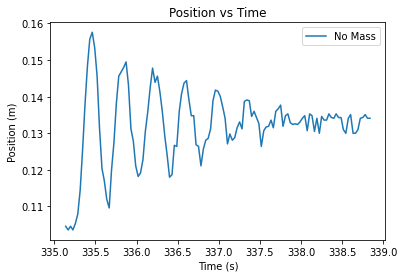

In [ ]:
# Read in the data from the Arduino
read_in_array_nm_1 = np.loadtxt('/content/drive/MyDrive/Academics/2022-2023/Winter 2023/Physics 4AL/Final Project/Horizontal Oscillation Trial1_3cm(no mass).txt', delimiter = ';')

# Extract the time and position of the Arduino. Convert the time from milliseconds to seconds and the position from centimeters to meters
time_nm_1 = read_in_array_nm_1[:, 0] / 1000
position_nm_1 = read_in_array_nm_1[:, 1] / 100


# Plot the position of the Arduino as a function of time
plt.plot(time_nm_1, position_nm_1, label = 'No Mass')

# Include title, axis labels
plt.title('Position vs Time')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

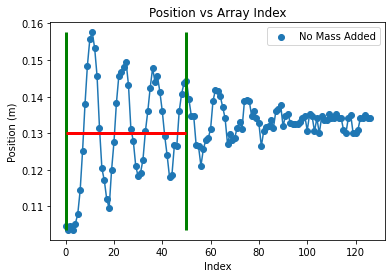

In [ ]:
# Change the start and stop indecies to cover a range of 3-4 oscillations
start_index_nm_1 = 0
stop_index_nm_1 = 50

# Plot the position vs. array index
plt.scatter(np.arange(len(position_nm_1)), position_nm_1, label = 'No Mass Added')
plt.plot(np.arange(len(position_nm_1)), position_nm_1)

# Include a title and axis labels
plt.title('Position vs Array Index')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Position (m)')

# These green vertical lines are the start and stop times. The red line is the offset guess
# Change the start and stop times so that they intersect the red line at the same points where they intersect the data
plt.vlines([start_index_nm_1, stop_index_nm_1], np.min(position_nm_1), np.max(position_nm_1), color = 'green', linewidth = 3)

guess_offset_nm_1 = np.mean(position_nm_1[start_index_nm_1:stop_index_nm_1])

plt.hlines(guess_offset_nm_1, start_index_nm_1, stop_index_nm_1, color = 'red', linewidth = 3)

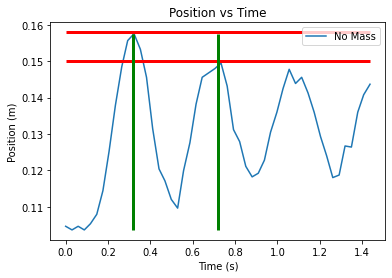

In [ ]:
# Extract the data within our specified window
time_window_nm_1 = time_nm_1[start_index_nm_1:stop_index_nm_1] - time_nm_1[start_index_nm_1]
position_window_nm_1 = position_nm_1[start_index_nm_1:stop_index_nm_1]

# Change these two horizontal line positions so that they align with two peaks of the data
peak_pos_1_nm_1 = 0.158
peak_pos_2_nm_1 = 0.15

# Change these two vertical line positions so that they align with the previously obtained peaks
peak_time_1_nm_1 = 0.32
peak_time_2_nm_1 = 0.72

# Plot the position vs. time. Include a title and axis labels
plt.plot(time_window_nm_1, position_window_nm_1, label = 'No Mass')
plt.title('Position vs Time')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

# Plot the horizontal lines for the peak positions and the vertical lines for the peak times

plt.hlines([peak_pos_1_nm_1, peak_pos_2_nm_1], time_window_nm_1[0], time_window_nm_1[-1], color = 'red', linewidth = 3)
plt.vlines([peak_time_1_nm_1, peak_time_2_nm_1], np.min(position_window_nm_1), np.max(position_window_nm_1), color = 'green', linewidth = 3)

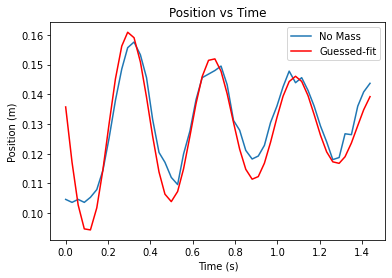

In [ ]:
# Write in our fit function here
def damped_fit_function(time, amplitude, coefficient, angular_frequency, phase, offset):
  height = amplitude * np.exp(-time * coefficient) * np.sin(angular_frequency * time + phase) + offset
  return height


# coefficient = b / 2m

# Obtain our other guess fit parameters
guess_amplitude_nm_1 = 0.04
guess_angular_frequency_nm_1 = 16
guess_phase_nm_1 = 3

# Use the formula for the coeffieicnt to obtain the guess for the coefficient
guess_coefficient_nm_1 = -np.log((peak_pos_2_nm_1 - guess_offset_nm_1) / (peak_pos_1_nm_1 - guess_offset_nm_1)) / (peak_time_2_nm_1 - peak_time_1_nm_1)

plt.plot(time_window_nm_1, position_window_nm_1, label = 'No Mass')
plt.plot(time_window_nm_1, damped_fit_function(time_window_nm_1, guess_amplitude_nm_1, guess_coefficient_nm_1, guess_angular_frequency_nm_1, guess_phase_nm_1, guess_offset_nm_1), color = 'r', label = 'Guessed-fit')

plt.title('Position vs Time')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

# Combine these into our guess parameters for our fit function
guess_params_nm_1 = np.array([guess_amplitude_nm_1, guess_coefficient_nm_1, guess_angular_frequency_nm_1, guess_phase_nm_1, guess_offset_nm_1])

Amplitude: 0.03308339679310431
Coefficient: 0.8611949114312614
Angular Frequency: 15.738495488691491
Phase: 3.1943768640593055
Offset: 0.13182386358353457


Text(0, 0.5, 'Position (m)')

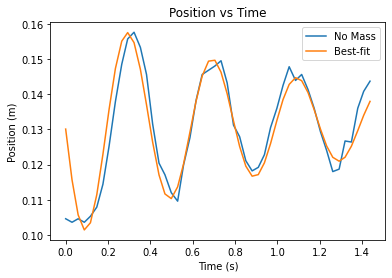

In [ ]:
# Use curve_fit to obtain the best-fit parameters
optimal_params_nm_1, param_covariance_nm_1 = sp.curve_fit(damped_fit_function, time_window_nm_1, position_window_nm_1, p0 = guess_params_nm_1)

best_amplitude_nm_1 = optimal_params_nm_1[0]
best_amplitude_error_nm_1 = np.sqrt(param_covariance_nm_1[0, 0])
print("Amplitude: " + str(best_amplitude_nm_1))

best_coefficient_nm_1 = optimal_params_nm_1[1]
best_coefficient_error_nm_1 = np.sqrt(param_covariance_nm_1[1, 1])
print("Coefficient: " + str(best_coefficient_nm_1))

best_angular_frequency_nm_1 = optimal_params_nm_1[2]
best_angular_frequency_error_nm_1 = np.sqrt(param_covariance_nm_1[2, 2])
print("Angular Frequency: " + str(best_angular_frequency_nm_1))

best_phase_nm_1 = optimal_params_nm_1[3]
best_phase_error_nm_1 = np.sqrt(param_covariance_nm_1[3, 3])
print("Phase: " + str(best_phase_nm_1))

best_offset_nm_1 = optimal_params_nm_1[4]
best_offset_error_nm_1 = np.sqrt(param_covariance_nm_1[4, 4])
print("Offset: " + str(best_offset_nm_1))

# Plot the position vs. time and best-fit
plt.plot(time_window_nm_1, position_window_nm_1, label = 'No Mass')
plt.plot(time_window_nm_1, damped_fit_function(time_window_nm_1, best_amplitude_nm_1, best_coefficient_nm_1, best_angular_frequency_nm_1, best_phase_nm_1, best_offset_nm_1), label = 'Best-fit')

# Include title, axis labels, legend
plt.title('Position vs Time')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

In [ ]:
# Find the damping constant from best_lifetime_nm and from the mass
mass_nm = 0.419 # 0.226 kg
mass_error_nm = 0.0005

expression = 2 * mass_nm
expression_error = (2 * mass_nm * mass_error_nm) / mass_nm
b_nm_1 = (2 * mass_nm) * best_coefficient_nm_1
b_error_nm_1 = b_nm_1 * (np.sqrt((((2 * mass_nm * mass_error_nm) / mass_nm) / (2*mass_nm))**2 + (best_coefficient_error_nm_1 / best_coefficient_nm_1)**2))

print('The damping constant is '+  str(b_nm_1))
print('The error in the damping constant is '+ str(b_error_nm_1))

The damping constant is 0.721681335779397
The error in the damping constant is 0.14419132101683044


**No Mass Trial 2**

Text(0, 0.5, 'Position (m)')

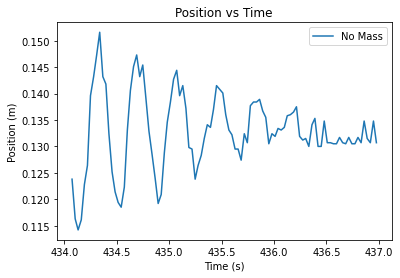

In [ ]:
# Read in the data from the Arduino
read_in_array_nm_2 = np.loadtxt('/content/drive/MyDrive/Academics/2022-2023/Winter 2023/Physics 4AL/Final Project/Horizontal Oscillation Trial4_3cm(no mass).txt', delimiter = ';')

# Extract the time and position of the Arduino. Convert the time from milliseconds to seconds and the position from centimeters to meters
time_nm_2 = read_in_array_nm_2[:, 0] / 1000
position_nm_2 = read_in_array_nm_2[:, 1] / 100


# Plot the position of the Arduino as a function of time
plt.plot(time_nm_2, position_nm_2, label = 'No Mass')

# Include title, axis labels
plt.title('Position vs Time')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

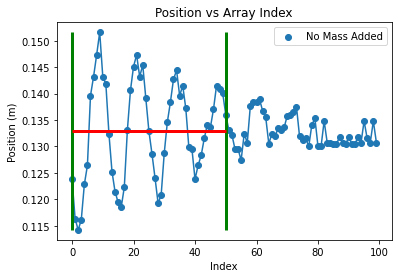

In [ ]:
# Change the start and stop indecies to cover a range of 3-4 oscillations
start_index_nm_2 = 0
stop_index_nm_2 = 50

# Plot the position vs. array index
plt.scatter(np.arange(len(position_nm_2)), position_nm_2, label = 'No Mass Added')
plt.plot(np.arange(len(position_nm_2)), position_nm_2)

# Include a title and axis labels
plt.title('Position vs Array Index')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Position (m)')

# These green vertical lines are the start and stop times. The red line is the offset guess
# Change the start and stop times so that they intersect the red line at the same points where they intersect the data
plt.vlines([start_index_nm_2, stop_index_nm_2], np.min(position_nm_2), np.max(position_nm_2), color = 'green', linewidth = 3)

guess_offset_nm_2 = np.mean(position_nm_2[start_index_nm_2:stop_index_nm_2])

plt.hlines(guess_offset_nm_2, start_index_nm_2, stop_index_nm_2, color = 'red', linewidth = 3)

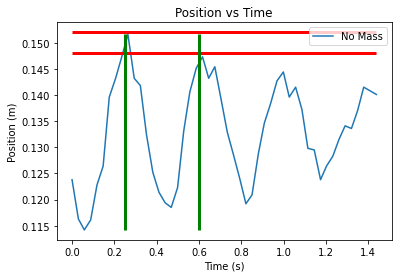

In [ ]:
# Extract the data within our specified window
time_window_nm_2 = time_nm_2[start_index_nm_2:stop_index_nm_2] - time_nm_2[start_index_nm_2]
position_window_nm_2 = position_nm_2[start_index_nm_2:stop_index_nm_2]

# Change these two horizontal line positions so that they align with two peaks of the data
peak_pos_1_nm_2 = 0.152
peak_pos_2_nm_2 = 0.148

# Change these two vertical line positions so that they align with the previously obtained peaks
peak_time_1_nm_2 = 0.25
peak_time_2_nm_2 = 0.6

# Plot the position vs. time. Include a title and axis labels
plt.plot(time_window_nm_2, position_window_nm_2, label = 'No Mass')
plt.title('Position vs Time')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

# Plot the horizontal lines for the peak positions and the vertical lines for the peak times

plt.hlines([peak_pos_1_nm_2, peak_pos_2_nm_2], time_window_nm_2[0], time_window_nm_2[-1], color = 'red', linewidth = 3)
plt.vlines([peak_time_1_nm_2, peak_time_2_nm_2], np.min(position_window_nm_2), np.max(position_window_nm_2), color = 'green', linewidth = 3)

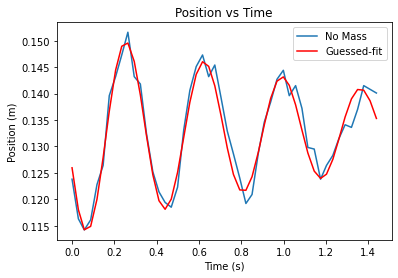

In [ ]:
# coefficient = b / 2m

# Obtain our other guess fit parameters
guess_amplitude_nm_2 = 0.02
guess_angular_frequency_nm_2 = 17
guess_phase_nm_2 = 3.5

# Use the formula for the coeffieicnt to obtain the guess for the coefficient
guess_coefficient_nm_2 = -np.log((peak_pos_2_nm_2 - guess_offset_nm_2) / (peak_pos_1_nm_2 - guess_offset_nm_2)) / (peak_time_2_nm_2 - peak_time_1_nm_2)

plt.plot(time_window_nm_2, position_window_nm_2, label = 'No Mass')
plt.plot(time_window_nm_2, damped_fit_function(time_window_nm_2, guess_amplitude_nm_2, guess_coefficient_nm_2, guess_angular_frequency_nm_2, guess_phase_nm_2, guess_offset_nm_2), color = 'r', label = 'Guessed-fit')

plt.title('Position vs Time')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

# Combine these into our guess parameters for our fit function
guess_params_nm_2 = np.array([guess_amplitude_nm_2, guess_coefficient_nm_2, guess_angular_frequency_nm_2, guess_phase_nm_2, guess_offset_nm_2])

Amplitude: 0.020280659073625976
Coefficient: 0.7155917219777647
Angular Frequency: 16.637154900330863
Phase: 3.6135801245993555
Offset: 0.13356268736626567


Text(0, 0.5, 'Position (m)')

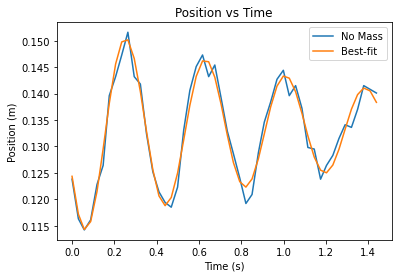

In [ ]:
# Use curve_fit to obtain the best-fit parameters
optimal_params_nm_2, param_covariance_nm_2 = sp.curve_fit(damped_fit_function, time_window_nm_2, position_window_nm_2, p0 = guess_params_nm_2)

best_amplitude_nm_2 = optimal_params_nm_2[0]
best_amplitude_error_nm_2 = np.sqrt(param_covariance_nm_2[0, 0])
print("Amplitude: " + str(best_amplitude_nm_2))

best_coefficient_nm_2 = optimal_params_nm_2[1]
best_coefficient_error_nm_2 = np.sqrt(param_covariance_nm_2[1, 1])
print("Coefficient: " + str(best_coefficient_nm_2))

best_angular_frequency_nm_2 = optimal_params_nm_2[2]
best_angular_frequency_error_nm_2 = np.sqrt(param_covariance_nm_2[2, 2])
print("Angular Frequency: " + str(best_angular_frequency_nm_2))

best_phase_nm_2 = optimal_params_nm_2[3]
best_phase_error_nm_2 = np.sqrt(param_covariance_nm_2[3, 3])
print("Phase: " + str(best_phase_nm_2))

best_offset_nm_2 = optimal_params_nm_2[4]
best_offset_error_nm_2 = np.sqrt(param_covariance_nm_2[4, 4])
print("Offset: " + str(best_offset_nm_2))

# Plot the position vs. time and best-fit
plt.plot(time_window_nm_2, position_window_nm_2, label = 'No Mass')
plt.plot(time_window_nm_2, damped_fit_function(time_window_nm_2, best_amplitude_nm_2, best_coefficient_nm_2, best_angular_frequency_nm_2, best_phase_nm_2, best_offset_nm_2), label = 'Best-fit')

# Include title, axis labels, legend
plt.title('Position vs Time')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

In [ ]:
# Find the damping constant from best_lifetime_nm and from the mass
mass_nm = 0.419 # 0.226 kg
mass_error_nm = 0.0005

expression = 2 * mass_nm
expression_error = (2 * mass_nm * mass_error_nm) / mass_nm
b_nm_2 = (2 * mass_nm) * best_coefficient_nm_2
b_error_nm_2 = b_nm_2 * (np.sqrt((((2 * mass_nm * mass_error_nm) / mass_nm) / (2*mass_nm))**2 + (best_coefficient_error_nm_2 / best_coefficient_nm_2)**2))

print('The damping constant is '+  str(b_nm_2))
print('The error in the damping constant is '+ str(b_error_nm_2))

The damping constant is 0.5996658630173668
The error in the damping constant is 0.06464960725286607


**No Mass Trial 3**

Text(0, 0.5, 'Position (m)')

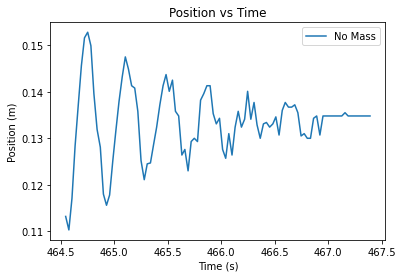

In [ ]:
# Read in the data from the Arduino
read_in_array_nm_3 = np.loadtxt('/content/drive/MyDrive/Academics/2022-2023/Winter 2023/Physics 4AL/Final Project/Horizontal Oscillation Trial5_3cm(no mass).txt', delimiter = ';')

# Extract the time and position of the Arduino. Convert the time from milliseconds to seconds and the position from centimeters to meters
time_nm_3 = read_in_array_nm_3[:, 0] / 1000
position_nm_3 = read_in_array_nm_3[:, 1] / 100


# Plot the position of the Arduino as a function of time
plt.plot(time_nm_3, position_nm_3, label = 'No Mass')

# Include title, axis labels
plt.title('Position vs Time')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

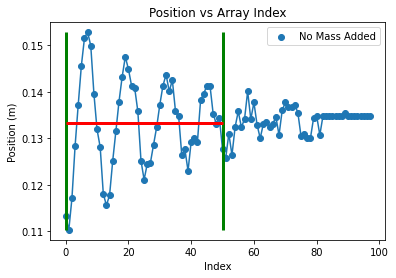

In [ ]:
# Change the start and stop indecies to cover a range of 3-4 oscillations
start_index_nm_3 = 0
stop_index_nm_3 = 50

# Plot the position vs. array index
plt.scatter(np.arange(len(position_nm_3)), position_nm_3, label = 'No Mass Added')
plt.plot(np.arange(len(position_nm_3)), position_nm_3)

# Include a title and axis labels
plt.title('Position vs Array Index')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Position (m)')

# These green vertical lines are the start and stop times. The red line is the offset guess
# Change the start and stop times so that they intersect the red line at the same points where they intersect the data
plt.vlines([start_index_nm_3, stop_index_nm_3], np.min(position_nm_3), np.max(position_nm_3), color = 'green', linewidth = 3)

guess_offset_nm_3 = np.mean(position_nm_3[start_index_nm_3:stop_index_nm_3])

plt.hlines(guess_offset_nm_3, start_index_nm_3, stop_index_nm_3, color = 'red', linewidth = 3)

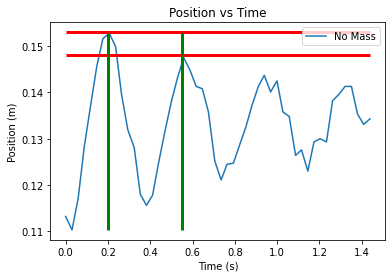

In [ ]:
# Extract the data within our specified window
time_window_nm_3 = time_nm_3[start_index_nm_3:stop_index_nm_3] - time_nm_3[start_index_nm_3]
position_window_nm_3 = position_nm_3[start_index_nm_3:stop_index_nm_3]

# Change these two horizontal line positions so that they align with two peaks of the data
peak_pos_1_nm_3 = 0.153
peak_pos_2_nm_3 = 0.148

# Change these two vertical line positions so that they align with the previously obtained peaks
peak_time_1_nm_3 = 0.2
peak_time_2_nm_3 = 0.55

# Plot the position vs. time. Include a title and axis labels
plt.plot(time_window_nm_3, position_window_nm_3, label = 'No Mass')
plt.title('Position vs Time')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

# Plot the horizontal lines for the peak positions and the vertical lines for the peak times

plt.hlines([peak_pos_1_nm_3, peak_pos_2_nm_3], time_window_nm_3[0], time_window_nm_3[-1], color = 'red', linewidth = 3)
plt.vlines([peak_time_1_nm_3, peak_time_2_nm_3], np.min(position_window_nm_3), np.max(position_window_nm_3), color = 'green', linewidth = 3)

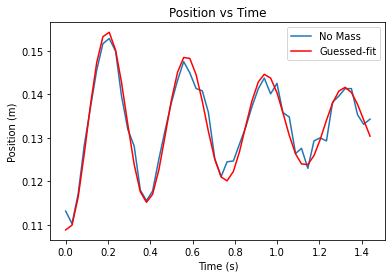

In [ ]:
# coefficient = b / 2m

# Obtain our other guess fit parameters
guess_amplitude_nm_3 = 0.025
guess_angular_frequency_nm_3 = 16.8
guess_phase_nm_3 = 4.5

# Use the formula for the coeffieicnt to obtain the guess for the coefficient
guess_coefficient_nm_3 = -np.log((peak_pos_2_nm_3 - guess_offset_nm_3) / (peak_pos_1_nm_3 - guess_offset_nm_3)) / (peak_time_2_nm_3 - peak_time_1_nm_3)

plt.plot(time_window_nm_3, position_window_nm_3, label = 'No Mass')
plt.plot(time_window_nm_3, damped_fit_function(time_window_nm_3, guess_amplitude_nm_3, guess_coefficient_nm_3, guess_angular_frequency_nm_3, guess_phase_nm_3, guess_offset_nm_3), color = 'r', label = 'Guessed-fit')

plt.title('Position vs Time')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

# Combine these into our guess parameters for our fit function
guess_params_nm_3 = np.array([guess_amplitude_nm_3, guess_coefficient_nm_3, guess_angular_frequency_nm_3, guess_phase_nm_3, guess_offset_nm_3])

Amplitude: 0.023044840156577068
Coefficient: 0.9342230085298563
Angular Frequency: 16.701329284677495
Phase: 4.51622136153413
Offset: 0.1335661085964087


Text(0, 0.5, 'Position (m)')

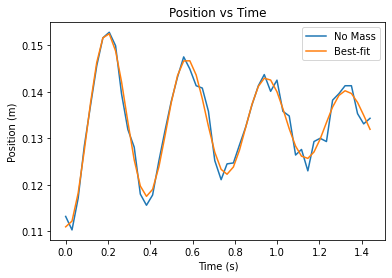

In [ ]:
# Use curve_fit to obtain the best-fit parameters
optimal_params_nm_3, param_covariance_nm_3 = sp.curve_fit(damped_fit_function, time_window_nm_3, position_window_nm_3, p0 = guess_params_nm_3)

best_amplitude_nm_3 = optimal_params_nm_3[0]
best_amplitude_error_nm_3 = np.sqrt(param_covariance_nm_3[0, 0])
print("Amplitude: " + str(best_amplitude_nm_3))

best_coefficient_nm_3 = optimal_params_nm_3[1]
best_coefficient_error_nm_3 = np.sqrt(param_covariance_nm_3[1, 1])
print("Coefficient: " + str(best_coefficient_nm_3))

best_angular_frequency_nm_3 = optimal_params_nm_3[2]
best_angular_frequency_error_nm_3 = np.sqrt(param_covariance_nm_3[2, 2])
print("Angular Frequency: " + str(best_angular_frequency_nm_3))

best_phase_nm_3 = optimal_params_nm_3[3]
best_phase_error_nm_3 = np.sqrt(param_covariance_nm_3[3, 3])
print("Phase: " + str(best_phase_nm_3))

best_offset_nm_3 = optimal_params_nm_3[4]
best_offset_error_nm_3 = np.sqrt(param_covariance_nm_3[4, 4])
print("Offset: " + str(best_offset_nm_3))

# Plot the position vs. time and best-fit
plt.plot(time_window_nm_3, position_window_nm_3, label = 'No Mass')
plt.plot(time_window_nm_3, damped_fit_function(time_window_nm_3, best_amplitude_nm_3, best_coefficient_nm_3, best_angular_frequency_nm_3, best_phase_nm_3, best_offset_nm_3), label = 'Best-fit')

# Include title, axis labels, legend
plt.title('Position vs Time')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

In [ ]:
b_nm_3 = (2 * mass_nm) * best_coefficient_nm_3
b_error_nm_3 = b_nm_3 * (np.sqrt((((2 * mass_nm * mass_error_nm) / mass_nm) / (2*mass_nm))**2 + (best_coefficient_error_nm_3 / best_coefficient_nm_3)**2))

print('The damping constant is '+  str(b_nm_3))
print('The error in the damping constant is '+ str(b_error_nm_3))

The damping constant is 0.7828788811480195
The error in the damping constant is 0.06352605847258269


In [ ]:
b_nm = (b_nm_1 + b_nm_2 + b_nm_3)/3
print("Average b value: " + str(b_nm))
b_nm_error = np.sqrt(b_error_nm_1**2 + b_error_nm_2**2 + b_error_nm_3**2)
b_nm_error = (b_nm) * b_nm_error / (b_nm_1 + b_nm_2 + b_nm_3)
print("Average b value error: " + str(b_nm_error))

Average b value: 0.7014086933149278
Average b value error: 0.056770756242971974


**Mass 1 Trial 1**

Text(0, 0.5, 'Position (m)')

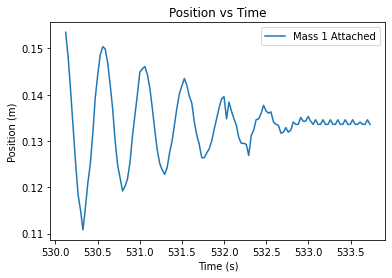

In [ ]:
# Read in the data from the Arduino
read_in_array_m1_1 = np.loadtxt('/content/drive/MyDrive/Academics/2022-2023/Winter 2023/Physics 4AL/Final Project/Horizontal Oscillation Trial1(mass 1).txt', delimiter = ';')

# Extract the time and position of the Arduino. Convert the time from milliseconds to seconds and the position from centimeters to meters
time_m1_1 = read_in_array_m1_1[:, 0] / 1000
position_m1_1 = read_in_array_m1_1[:, 1] / 100


# Plot the position of the Arduino as a function of time
plt.plot(time_m1_1, position_m1_1, label = 'Mass 1 Attached')

# Include title, axis labels
plt.title('Position vs Time')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

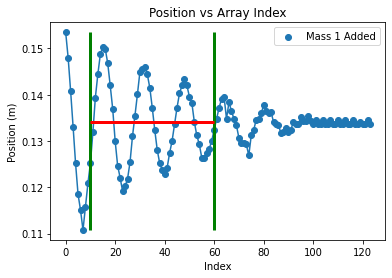

In [ ]:
# Change the start and stop indecies to cover a range of 3-4 oscillations
start_index_m1_1 = 10
stop_index_m1_1 = 60

# Plot the position vs. array index
plt.scatter(np.arange(len(position_m1_1)), position_m1_1, label = "Mass 1 Added")
plt.plot(np.arange(len(position_m1_1)), position_m1_1)

# Include a title and axis labels
plt.title('Position vs Array Index')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Position (m)')

# These green vertical lines are the start and stop times. The red line is the offset guess
# Change the start and stop times so that they intersect the red line at the same points where they intersect the data
plt.vlines([start_index_m1_1, stop_index_m1_1], np.min(position_m1_1), np.max(position_m1_1), color = 'green', linewidth = 3)

guess_offset_m1_1 = np.mean(position_m1_1[start_index_m1_1:stop_index_m1_1])

plt.hlines(guess_offset_m1_1, start_index_m1_1, stop_index_m1_1, color = 'red', linewidth = 3)

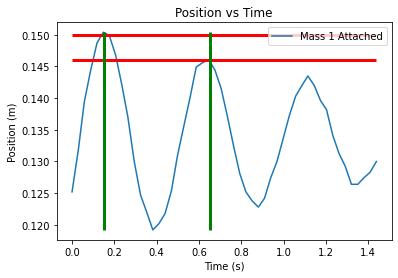

In [ ]:
# Extract the data within our specified window
time_window_m1_1 = time_m1_1[start_index_m1_1:stop_index_m1_1] - time_m1_1[start_index_m1_1]
position_window_m1_1 = position_m1_1[start_index_m1_1:stop_index_m1_1]

# Change these two horizontal line positions so that they align with two peaks of the data
peak_pos_1_m1_1 = 0.15
peak_pos_2_m1_1 = 0.146

# Change these two vertical line positions so that they align with the previously obtained peaks
peak_time_1_m1_1 = 0.15
peak_time_2_m1_1 = 0.65

# Plot the position vs. time. Include a title and axis labels
plt.plot(time_window_m1_1, position_window_m1_1, label = 'Mass 1 Attached')
plt.title('Position vs Time')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

# Plot the horizontal lines for the peak positions and the vertical lines for the peak times

plt.hlines([peak_pos_1_m1_1, peak_pos_2_m1_1], time_window_m1_1[0], time_window_m1_1[-1], color = 'red', linewidth = 3)
plt.vlines([peak_time_1_m1_1, peak_time_2_m1_1], np.min(position_window_m1_1), np.max(position_window_m1_1), color = 'green', linewidth = 3)

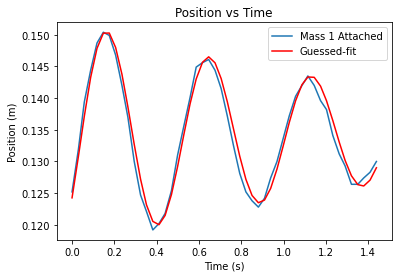

In [ ]:
# coefficient = b / 2m

# Obtain our other guess fit parameters
guess_amplitude_m1_1 = 0.018
guess_angular_frequency_m1_1 = 13
guess_phase_m1_1 = 5.7

# Use the formula for the coeffieicnt to obtain the guess for the coefficient
guess_coefficient_m1_1 = -np.log((peak_pos_2_m1_1 - guess_offset_m1_1) / (peak_pos_1_m1_1 - guess_offset_m1_1)) / (peak_time_2_m1_1 - peak_time_1_m1_1)

plt.plot(time_window_m1_1, position_window_m1_1, label = 'Mass 1 Attached')
plt.plot(time_window_m1_1, damped_fit_function(time_window_m1_1, guess_amplitude_m1_1, guess_coefficient_m1_1, guess_angular_frequency_m1_1, guess_phase_m1_1, guess_offset_m1_1), color = 'r', label = 'Guessed-fit')

plt.title('Position vs Time')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

# Combine these into our guess parameters for our fit function
guess_params_m1_1 = np.array([guess_amplitude_m1_1, guess_coefficient_m1_1, guess_angular_frequency_m1_1, guess_phase_m1_1, guess_offset_m1_1])

Amplitude: 0.01870390039721855
Coefficient: 0.6547574908160393
Angular Frequency: 13.082450423926067
Phase: 5.802532262689459
Offset: 0.13380211037215256


Text(0, 0.5, 'Position (m)')

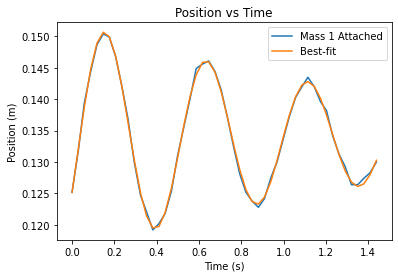

In [ ]:
# Use curve_fit to obtain the best-fit parameters
optimal_params_m1_1, param_covariance_m1_1 = sp.curve_fit(damped_fit_function, time_window_m1_1, position_window_m1_1, p0 = guess_params_m1_1)

best_amplitude_m1_1 = optimal_params_m1_1[0]
best_amplitude_error_m1_1 = np.sqrt(param_covariance_m1_1[0, 0])
print("Amplitude: " + str(best_amplitude_m1_1))

best_coefficient_m1_1 = optimal_params_m1_1[1]
best_coefficient_error_m1_1 = np.sqrt(param_covariance_m1_1[1, 1])
print("Coefficient: " + str(best_coefficient_m1_1))

best_angular_frequency_m1_1 = optimal_params_m1_1[2]
best_angular_frequency_error_m1_1 = np.sqrt(param_covariance_m1_1[2, 2])
print("Angular Frequency: " + str(best_angular_frequency_m1_1))

best_phase_m1_1 = optimal_params_m1_1[3]
best_phase_error_m1_1 = np.sqrt(param_covariance_m1_1[3, 3])
print("Phase: " + str(best_phase_m1_1))

best_offset_m1_1 = optimal_params_m1_1[4]
best_offset_error_m1_1 = np.sqrt(param_covariance_m1_1[4, 4])
print("Offset: " + str(best_offset_m1_1))

# Plot the position vs. time and best-fit
plt.plot(time_window_m1_1, position_window_m1_1, label = 'Mass 1 Attached')
plt.plot(time_window_m1_1, damped_fit_function(time_window_m1_1, best_amplitude_m1_1, best_coefficient_m1_1, best_angular_frequency_m1_1, best_phase_m1_1, best_offset_m1_1), label = 'Best-fit')

# Include title, axis labels, legend
plt.title('Position vs Time')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

In [ ]:
# Find the damping constant from best_lifetime_nm and from the mass
mass_m1 = 0.419 + 0.265
mass_error_m1 = np.sqrt((0.0005)**2 + (0.0005)**2)
print(mass_error_m1)

b_m1_1 = (2 * mass_m1) * best_coefficient_m1_1
b_error_m1_1 = b_m1_1 * np.sqrt((((2 * mass_m1 * mass_error_m1) / mass_m1) / (2*mass_m1))**2 + (best_coefficient_error_m1_1 / best_coefficient_m1_1)**2)
print(b_m1_1)
print(b_error_m1_1)

# BRUH

0.0007071067811865475
0.8957082474363417
0.025934888082670627


**Mass 1 Trial 2**

Text(0, 0.5, 'Position (m)')

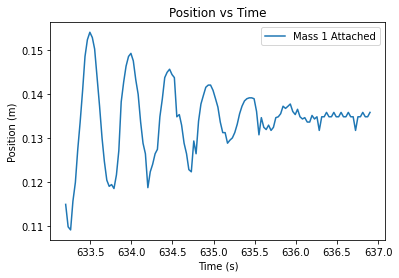

In [ ]:
# Read in the data from the Arduino
read_in_array_m1_2 = np.loadtxt('/content/drive/MyDrive/Academics/2022-2023/Winter 2023/Physics 4AL/Final Project/Horizontal Oscillation Trial2(mass 1).txt', delimiter = ';')

# Extract the time and position of the Arduino. Convert the time from milliseconds to seconds and the position from centimeters to meters
time_m1_2 = read_in_array_m1_2[:, 0] / 1000
position_m1_2 = read_in_array_m1_2[:, 1] / 100


# Plot the position of the Arduino as a function of time
plt.plot(time_m1_2, position_m1_2, label = 'Mass 1 Attached')

# Include title, axis labels
plt.title('Position vs Time')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

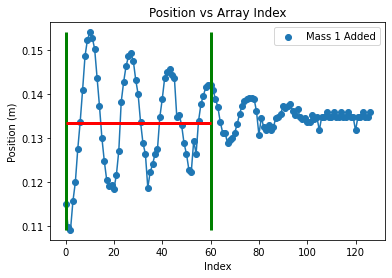

In [ ]:
# Change the start and stop indecies to cover a range of 3-4 oscillations
start_index_m1_2 = 0
stop_index_m1_2 = 60

# Plot the position vs. array index
plt.scatter(np.arange(len(position_m1_2)), position_m1_2, label = "Mass 1 Added")
plt.plot(np.arange(len(position_m1_2)), position_m1_2)

# Include a title and axis labels
plt.title('Position vs Array Index')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Position (m)')

# These green vertical lines are the start and stop times. The red line is the offset guess
# Change the start and stop times so that they intersect the red line at the same points where they intersect the data
plt.vlines([start_index_m1_2, stop_index_m1_2], np.min(position_m1_2), np.max(position_m1_2), color = 'green', linewidth = 3)

guess_offset_m1_2 = np.mean(position_m1_2[start_index_m1_2:stop_index_m1_2])

plt.hlines(guess_offset_m1_2, start_index_m1_2, stop_index_m1_2, color = 'red', linewidth = 3)

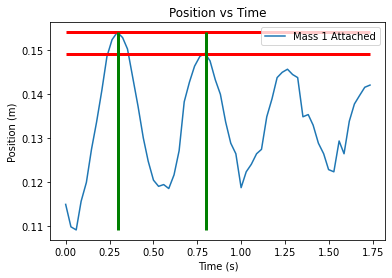

In [ ]:
# Extract the data within our specified window
time_window_m1_2 = time_m1_2[start_index_m1_2:stop_index_m1_2] - time_m1_2[start_index_m1_2]
position_window_m1_2 = position_m1_2[start_index_m1_2:stop_index_m1_2]

# Change these two horizontal line positions so that they align with two peaks of the data
peak_pos_1_m1_2 = 0.154
peak_pos_2_m1_2 = 0.149

# Change these two vertical line positions so that they align with the previously obtained peaks
peak_time_1_m1_2 = 0.3
peak_time_2_m1_2 = 0.8

# Plot the position vs. time. Include a title and axis labels
plt.plot(time_window_m1_2, position_window_m1_2, label = 'Mass 1 Attached')
plt.title('Position vs Time')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

# Plot the horizontal lines for the peak positions and the vertical lines for the peak times

plt.hlines([peak_pos_1_m1_2, peak_pos_2_m1_2], time_window_m1_2[0], time_window_m1_2[-1], color = 'red', linewidth = 3)
plt.vlines([peak_time_1_m1_2, peak_time_2_m1_2], np.min(position_window_m1_2), np.max(position_window_m1_2), color = 'green', linewidth = 3)

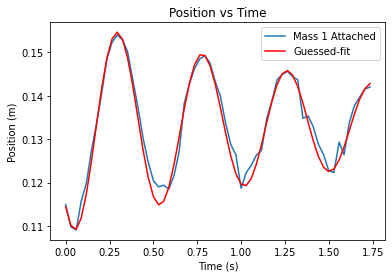

In [ ]:
# coefficient = b / 2m

# Obtain our other guess fit parameters
guess_amplitude_m1_2 = 0.025
guess_angular_frequency_m1_2 = 13
guess_phase_m1_2 = 4

# Use the formula for the coeffieicnt to obtain the guess for the coefficient
guess_coefficient_m1_2 = -np.log((peak_pos_2_m1_2 - guess_offset_m1_2) / (peak_pos_1_m1_2 - guess_offset_m1_2)) / (peak_time_2_m1_2 - peak_time_1_m1_2)

plt.plot(time_window_m1_2, position_window_m1_2, label = 'Mass 1 Attached')
plt.plot(time_window_m1_2, damped_fit_function(time_window_m1_2, guess_amplitude_m1_2, guess_coefficient_m1_2, guess_angular_frequency_m1_2, guess_phase_m1_2, guess_offset_m1_2), color = 'r', label = 'Guessed-fit')

plt.title('Position vs Time')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

# Combine these into our guess parameters for our fit function
guess_params_m1_2 = np.array([guess_amplitude_m1_2, guess_coefficient_m1_2, guess_angular_frequency_m1_2, guess_phase_m1_2, guess_offset_m1_2])

Amplitude: 0.024107878633470522
Coefficient: 0.602502387832417
Angular Frequency: 12.971653084990578
Phase: 3.9647941284355324
Offset: 0.13434142078352013


Text(0, 0.5, 'Position (m)')

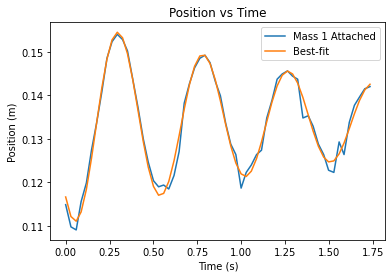

In [ ]:
# Use curve_fit to obtain the best-fit parameters
optimal_params_m1_2, param_covariance_m1_2 = sp.curve_fit(damped_fit_function, time_window_m1_2, position_window_m1_2, p0 = guess_params_m1_2)

best_amplitude_m1_2 = optimal_params_m1_2[0]
best_amplitude_error_m1_2 = np.sqrt(param_covariance_m1_2[0, 0])
print("Amplitude: " + str(best_amplitude_m1_2))

best_coefficient_m1_2 = optimal_params_m1_2[1]
best_coefficient_error_m1_2 = np.sqrt(param_covariance_m1_2[1, 1])
print("Coefficient: " + str(best_coefficient_m1_2))

best_angular_frequency_m1_2 = optimal_params_m1_2[2]
best_angular_frequency_error_m1_2 = np.sqrt(param_covariance_m1_2[2, 2])
print("Angular Frequency: " + str(best_angular_frequency_m1_2))

best_phase_m1_2 = optimal_params_m1_2[3]
best_phase_error_m1_2 = np.sqrt(param_covariance_m1_2[3, 3])
print("Phase: " + str(best_phase_m1_2))

best_offset_m1_2 = optimal_params_m1_2[4]
best_offset_error_m1_2 = np.sqrt(param_covariance_m1_2[4, 4])
print("Offset: " + str(best_offset_m1_2))

# Plot the position vs. time and best-fit
plt.plot(time_window_m1_2, position_window_m1_2, label = 'Mass 1 Attached')
plt.plot(time_window_m1_2, damped_fit_function(time_window_m1_2, best_amplitude_m1_2, best_coefficient_m1_2, best_angular_frequency_m1_2, best_phase_m1_2, best_offset_m1_2), label = 'Best-fit')

# Include title, axis labels, legend
plt.title('Position vs Time')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

In [ ]:
b_m1_2 = (2 * mass_m1) * best_coefficient_m1_2
b_error_m1_2 = b_m1_2 * np.sqrt((((2 * mass_m1 * mass_error_m1) / mass_m1) / (2*mass_m1))**2 + (best_coefficient_error_m1_2 / best_coefficient_m1_2)**2)
print(b_m1_2)
print(b_error_m1_2)

0.8242232665547464
0.05636429272232168


**Mass 1 Trial 3**

Text(0, 0.5, 'Position (m)')

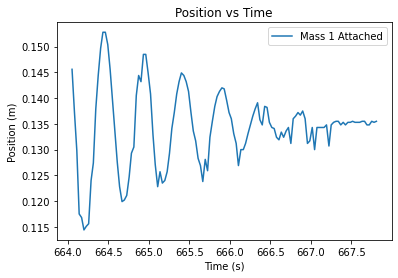

In [ ]:
# Read in the data from the Arduino
read_in_array_m1_3 = np.loadtxt('/content/drive/MyDrive/Academics/2022-2023/Winter 2023/Physics 4AL/Final Project/Horizontal Oscillation Trial3(mass 1).txt', delimiter = ';')

# Extract the time and position of the Arduino. Convert the time from milliseconds to seconds and the position from centimeters to meters
time_m1_3 = read_in_array_m1_3[:, 0] / 1000
position_m1_3 = read_in_array_m1_3[:, 1] / 100


# Plot the position of the Arduino as a function of time
plt.plot(time_m1_3, position_m1_3, label = 'Mass 1 Attached')

# Include title, axis labels
plt.title('Position vs Time')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

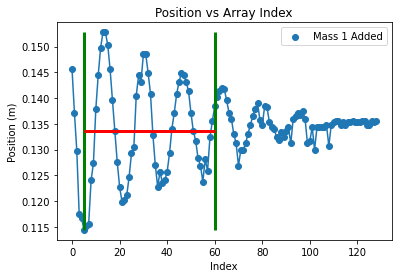

In [ ]:
# Change the start and stop indecies to cover a range of 3-4 oscillations
start_index_m1_3 = 5
stop_index_m1_3 = 60

# Plot the position vs. array index
plt.scatter(np.arange(len(position_m1_3)), position_m1_3, label = "Mass 1 Added")
plt.plot(np.arange(len(position_m1_3)), position_m1_3)

# Include a title and axis labels
plt.title('Position vs Array Index')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Position (m)')

# These green vertical lines are the start and stop times. The red line is the offset guess
# Change the start and stop times so that they intersect the red line at the same points where they intersect the data
plt.vlines([start_index_m1_3, stop_index_m1_3], np.min(position_m1_3), np.max(position_m1_3), color = 'green', linewidth = 3)

guess_offset_m1_3 = np.mean(position_m1_3[start_index_m1_3:stop_index_m1_3])

plt.hlines(guess_offset_m1_3, start_index_m1_3, stop_index_m1_3, color = 'red', linewidth = 3)

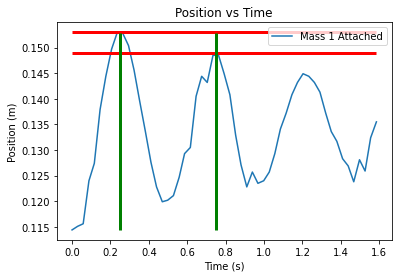

In [ ]:
# Extract the data within our specified window
time_window_m1_3 = time_m1_3[start_index_m1_3:stop_index_m1_3] - time_m1_3[start_index_m1_3]
position_window_m1_3 = position_m1_3[start_index_m1_3:stop_index_m1_3]

# Change these two horizontal line positions so that they align with two peaks of the data
peak_pos_1_m1_3 = 0.153
peak_pos_2_m1_3 = 0.149

# Change these two vertical line positions so that they align with the previously obtained peaks
peak_time_1_m1_3 = 0.25
peak_time_2_m1_3 = 0.75

# Plot the position vs. time. Include a title and axis labels
plt.plot(time_window_m1_3, position_window_m1_3, label = 'Mass 1 Attached')
plt.title('Position vs Time')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

# Plot the horizontal lines for the peak positions and the vertical lines for the peak times

plt.hlines([peak_pos_1_m1_3, peak_pos_2_m1_3], time_window_m1_3[0], time_window_m1_3[-1], color = 'red', linewidth = 3)
plt.vlines([peak_time_1_m1_3, peak_time_2_m1_3], np.min(position_window_m1_3), np.max(position_window_m1_3), color = 'green', linewidth = 3)

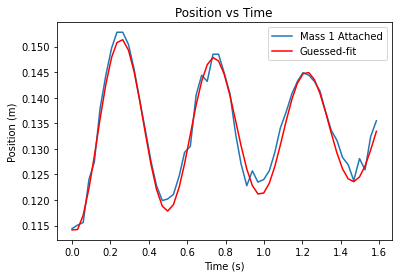

In [ ]:
# coefficient = b / 2m

# Obtain our other guess fit parameters
guess_amplitude_m1_3 = 0.02
guess_angular_frequency_m1_3 = 13
guess_phase_m1_3 = 4.5

# Use the formula for the coeffieicnt to obtain the guess for the coefficient
guess_coefficient_m1_3 = -np.log((peak_pos_2_m1_3 - guess_offset_m1_3) / (peak_pos_1_m1_3 - guess_offset_m1_3)) / (peak_time_2_m1_3 - peak_time_1_m1_3)

plt.plot(time_window_m1_3, position_window_m1_3, label = 'Mass 1 Attached')
plt.plot(time_window_m1_3, damped_fit_function(time_window_m1_3, guess_amplitude_m1_3, guess_coefficient_m1_3, guess_angular_frequency_m1_3, guess_phase_m1_3, guess_offset_m1_3), color = 'r', label = 'Guessed-fit')

plt.title('Position vs Time')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

# Combine these into our guess parameters for our fit function
guess_params_m1_3 = np.array([guess_amplitude_m1_3, guess_coefficient_m1_3, guess_angular_frequency_m1_3, guess_phase_m1_3, guess_offset_m1_3])

Amplitude: 0.0209517995716455
Coefficient: 0.5937457175815728
Angular Frequency: 13.063209653636973
Phase: 4.506951317697179
Offset: 0.13453494017275783


Text(0, 0.5, 'Position (m)')

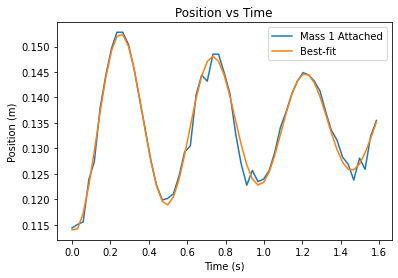

In [ ]:
# Use curve_fit to obtain the best-fit parameters
optimal_params_m1_3, param_covariance_m1_3 = sp.curve_fit(damped_fit_function, time_window_m1_3, position_window_m1_3, p0 = guess_params_m1_3)

best_amplitude_m1_3 = optimal_params_m1_3[0]
best_amplitude_error_m1_3 = np.sqrt(param_covariance_m1_3[0, 0])
print("Amplitude: " + str(best_amplitude_m1_3))

best_coefficient_m1_3 = optimal_params_m1_3[1]
best_coefficient_error_m1_3 = np.sqrt(param_covariance_m1_3[1, 1])
print("Coefficient: " + str(best_coefficient_m1_3))

best_angular_frequency_m1_3 = optimal_params_m1_3[2]
best_angular_frequency_error_m1_3 = np.sqrt(param_covariance_m1_3[2, 2])
print("Angular Frequency: " + str(best_angular_frequency_m1_3))

best_phase_m1_3 = optimal_params_m1_3[3]
best_phase_error_m1_3 = np.sqrt(param_covariance_m1_3[3, 3])
print("Phase: " + str(best_phase_m1_3))

best_offset_m1_3 = optimal_params_m1_3[4]
best_offset_error_m1_3 = np.sqrt(param_covariance_m1_3[4, 4])
print("Offset: " + str(best_offset_m1_3))

# Plot the position vs. time and best-fit
plt.plot(time_window_m1_3, position_window_m1_3, label = 'Mass 1 Attached')
plt.plot(time_window_m1_3, damped_fit_function(time_window_m1_3, best_amplitude_m1_3, best_coefficient_m1_3, best_angular_frequency_m1_3, best_phase_m1_3, best_offset_m1_3), label = 'Best-fit')

# Include title, axis labels, legend
plt.title('Position vs Time')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

In [ ]:
b_m1_3 = (2 * mass_m1) * best_coefficient_m1_3
b_error_m1_3 = b_m1_3 * np.sqrt((((2 * mass_m1 * mass_error_m1) / mass_m1) / (2*mass_m1))**2 + (best_coefficient_error_m1_3 / best_coefficient_m1_3)**2)
print(b_m1_3)
print(b_error_m1_3)

0.8122441416515915
0.06418441747049969


In [ ]:
b_m1 = (b_m1_1 + b_m1_2 + b_m1_3)/3
print("Average b value: " + str(b_m1))
b_m1_error = np.sqrt(b_error_m1_1**2 + b_error_m1_2**2 + b_error_m1_3**2)
b_m1_error = (b_m1) * b_m1_error / (b_m1_1 + b_m1_2 + b_m1_3)
print("Average b value error: " + str(b_m1_error))

Average b value: 0.8440585518808933
Average b value error: 0.029756775810963722


**Mass 1 + 2 Trial 1**

Text(0, 0.5, 'Position (m)')

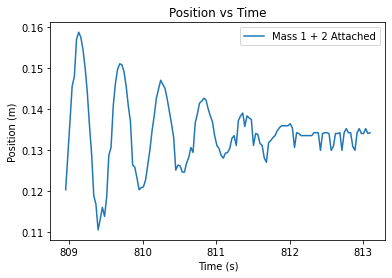

In [ ]:
# Read in the data from the Arduino
read_in_array_m2_1 = np.loadtxt('/content/drive/MyDrive/Academics/2022-2023/Winter 2023/Physics 4AL/Final Project/Horizontal Oscillation Trial1(mass 1_2).txt', delimiter = ';')

# Extract the time and position of the Arduino. Convert the time from milliseconds to seconds and the position from centimeters to meters
time_m2_1 = read_in_array_m2_1[:, 0] / 1000
position_m2_1 = read_in_array_m2_1[:, 1] / 100


# Plot the position of the Arduino as a function of time
plt.plot(time_m2_1, position_m2_1, label = 'Mass 1 + 2 Attached')

# Include title, axis labels
plt.title('Position vs Time')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

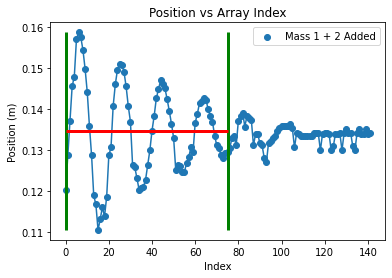

In [ ]:
# Change the start and stop indecies to cover a range of 3-4 oscillations
start_index_m2_1 = 0
stop_index_m2_1 = 75

# Plot the position vs. array index
plt.scatter(np.arange(len(position_m2_1)), position_m2_1, label = "Mass 1 + 2 Added")
plt.plot(np.arange(len(position_m2_1)), position_m2_1)

# Include a title and axis labels
plt.title('Position vs Array Index')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Position (m)')

# These green vertical lines are the start and stop times. The red line is the offset guess
# Change the start and stop times so that they intersect the red line at the same points where they intersect the data
plt.vlines([start_index_m2_1, stop_index_m2_1], np.min(position_m2_1), np.max(position_m2_1), color = 'green', linewidth = 3)

guess_offset_m2_1 = np.mean(position_m2_1[start_index_m2_1:stop_index_m2_1])

plt.hlines(guess_offset_m2_1, start_index_m2_1, stop_index_m2_1, color = 'red', linewidth = 3)

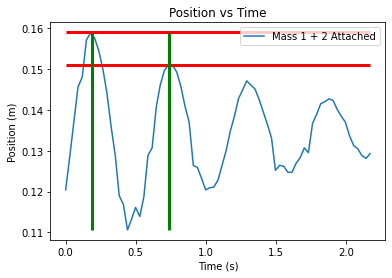

In [ ]:
# Extract the data within our specified window
time_window_m2_1 = time_m2_1[start_index_m2_1:stop_index_m2_1] - time_m2_1[start_index_m2_1]
position_window_m2_1 = position_m2_1[start_index_m2_1:stop_index_m2_1]

# Change these two horizontal line positions so that they align with two peaks of the data
peak_pos_1_m2_1 = 0.159
peak_pos_2_m2_1 = 0.151

# Change these two vertical line positions so that they align with the previously obtained peaks
peak_time_1_m2_1 = 0.19
peak_time_2_m2_1 = 0.74

# Plot the position vs. time. Include a title and axis labels
plt.plot(time_window_m2_1, position_window_m2_1, label = 'Mass 1 + 2 Attached')
plt.title('Position vs Time')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

# Plot the horizontal lines for the peak positions and the vertical lines for the peak times

plt.hlines([peak_pos_1_m2_1, peak_pos_2_m2_1], time_window_m2_1[0], time_window_m2_1[-1], color = 'red', linewidth = 3)
plt.vlines([peak_time_1_m2_1, peak_time_2_m2_1], np.min(position_window_m2_1), np.max(position_window_m2_1), color = 'green', linewidth = 3)

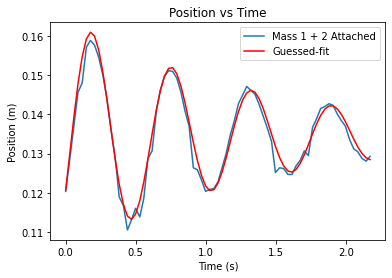

In [ ]:
# coefficient = b / 2m

# Obtain our other guess fit parameters
guess_amplitude_m2_1 = 0.03
guess_angular_frequency_m2_1 = 11
guess_phase_m2_1 = 5.8

# Use the formula for the coeffieicnt to obtain the guess for the coefficient
guess_coefficient_m2_1 = -np.log((peak_pos_2_m2_1 - guess_offset_m2_1) / (peak_pos_1_m2_1 - guess_offset_m2_1)) / (peak_time_2_m2_1 - peak_time_1_m2_1)

plt.plot(time_window_m2_1, position_window_m2_1, label = 'Mass 1 + 2 Attached')
plt.plot(time_window_m2_1, damped_fit_function(time_window_m2_1, guess_amplitude_m2_1, guess_coefficient_m2_1, guess_angular_frequency_m2_1, guess_phase_m2_1, guess_offset_m2_1), color = 'r', label = 'Guessed-fit')

plt.title('Position vs Time')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

# Combine these into our guess parameters for our fit function
guess_params_m2_1 = np.array([guess_amplitude_m2_1, guess_coefficient_m2_1, guess_angular_frequency_m2_1, guess_phase_m2_1, guess_offset_m2_1])

Amplitude: 0.028563973107425963
Coefficient: 0.6599224674285453
Angular Frequency: 11.165809282758794
Phase: 5.728408240687715
Offset: 0.13387926348002877


Text(0, 0.5, 'Position (m)')

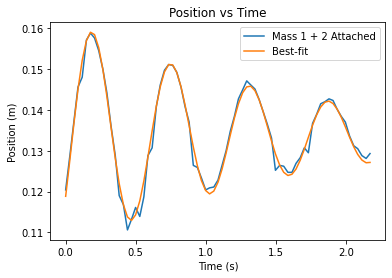

In [ ]:
# Use curve_fit to obtain the best-fit parameters
optimal_params_m2_1, param_covariance_m2_1 = sp.curve_fit(damped_fit_function, time_window_m2_1, position_window_m2_1, p0 = guess_params_m2_1)

best_amplitude_m2_1 = optimal_params_m2_1[0]
best_amplitude_error_m2_1 = np.sqrt(param_covariance_m2_1[0, 0])
print("Amplitude: " + str(best_amplitude_m2_1))

best_coefficient_m2_1 = optimal_params_m2_1[1]
best_coefficient_error_m2_1 = np.sqrt(param_covariance_m2_1[1, 1])
print("Coefficient: " + str(best_coefficient_m2_1))

best_angular_frequency_m2_1 = optimal_params_m2_1[2]
best_angular_frequency_error_m2_1 = np.sqrt(param_covariance_m2_1[2, 2])
print("Angular Frequency: " + str(best_angular_frequency_m2_1))

best_phase_m2_1 = optimal_params_m2_1[3]
best_phase_error_m2_1 = np.sqrt(param_covariance_m2_1[3, 3])
print("Phase: " + str(best_phase_m2_1))

best_offset_m2_1 = optimal_params_m2_1[4]
best_offset_error_m2_1 = np.sqrt(param_covariance_m2_1[4, 4])
print("Offset: " + str(best_offset_m2_1))

# Plot the position vs. time and best-fit
plt.plot(time_window_m2_1, position_window_m2_1, label = 'Mass 1 + 2 Attached')
plt.plot(time_window_m2_1, damped_fit_function(time_window_m2_1, best_amplitude_m2_1, best_coefficient_m2_1, best_angular_frequency_m2_1, best_phase_m2_1, best_offset_m2_1), label = 'Best-fit')

# Include title, axis labels, legend
plt.title('Position vs Time')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

In [ ]:
# Find the damping constant from best_lifetime_nm and from the mass
mass_m2 = 0.419 + 0.265 + 0.264 # 0.226 kg
mass_error_m2 = np.sqrt((0.0005)**2 + (0.0005)**2 + (0.0005)**2)
print(mass_error_m2)

b_m2_1 = (2 * mass_m2) * best_coefficient_m2_1
b_error_m2_1 = b_m2_1 * np.sqrt((((2 * mass_m2 * mass_error_m2) / mass_m2) / (2*mass_m2))**2 + (best_coefficient_error_m2_1 / best_coefficient_m2_1)**2)
print(b_m2_1)
print(b_error_m2_1)

0.0008660254037844387
1.251212998244522
0.05907029311285647


**Mass 1+2 Trial 2**

Text(0, 0.5, 'Position (m)')

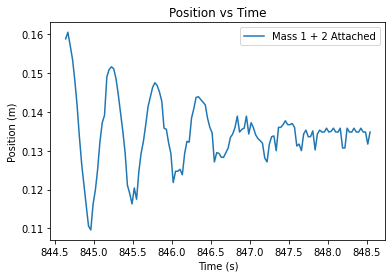

In [ ]:
# Read in the data from the Arduino
read_in_array_m2_2 = np.loadtxt('/content/drive/MyDrive/Academics/2022-2023/Winter 2023/Physics 4AL/Final Project/Horizontal Oscillation Trial2(mass 1_2).txt', delimiter = ';')

# Extract the time and position of the Arduino. Convert the time from milliseconds to seconds and the position from centimeters to meters
time_m2_2 = read_in_array_m2_2[:, 0] / 1000
position_m2_2 = read_in_array_m2_2[:, 1] / 100


# Plot the position of the Arduino as a function of time
plt.plot(time_m2_2, position_m2_2, label = 'Mass 1 + 2 Attached')

# Include title, axis labels
plt.title('Position vs Time')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

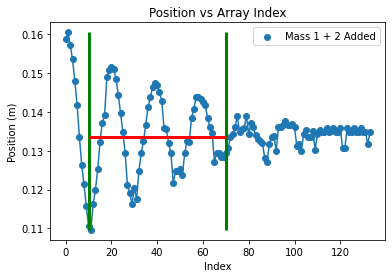

In [ ]:
# Change the start and stop indecies to cover a range of 3-4 oscillations
start_index_m2_2 = 10
stop_index_m2_2 = 70

# Plot the position vs. array index
plt.scatter(np.arange(len(position_m2_2)), position_m2_2, label = "Mass 1 + 2 Added")
plt.plot(np.arange(len(position_m2_2)), position_m2_2)

# Include a title and axis labels
plt.title('Position vs Array Index')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Position (m)')

# These green vertical lines are the start and stop times. The red line is the offset guess
# Change the start and stop times so that they intersect the red line at the same points where they intersect the data
plt.vlines([start_index_m2_2, stop_index_m2_2], np.min(position_m2_2), np.max(position_m2_2), color = 'green', linewidth = 3)

guess_offset_m2_2 = np.mean(position_m2_2[start_index_m2_2:stop_index_m2_2])

plt.hlines(guess_offset_m2_2, start_index_m2_2, stop_index_m2_2, color = 'red', linewidth = 3)

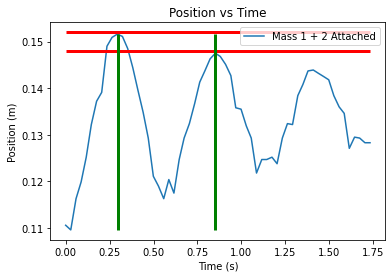

In [ ]:
# Extract the data within our specified window
time_window_m2_2 = time_m2_2[start_index_m2_2:stop_index_m2_2] - time_m2_2[start_index_m2_2]
position_window_m2_2 = position_m2_2[start_index_m2_2:stop_index_m2_2]

# Change these two horizontal line positions so that they align with two peaks of the data
peak_pos_1_m2_2 = 0.152
peak_pos_2_m2_2 = 0.148

# Change these two vertical line positions so that they align with the previously obtained peaks
peak_time_1_m2_2 = 0.3
peak_time_2_m2_2 = 0.85

# Plot the position vs. time. Include a title and axis labels
plt.plot(time_window_m2_2, position_window_m2_2, label = 'Mass 1 + 2 Attached')
plt.title('Position vs Time')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

# Plot the horizontal lines for the peak positions and the vertical lines for the peak times

plt.hlines([peak_pos_1_m2_2, peak_pos_2_m2_2], time_window_m2_2[0], time_window_m2_2[-1], color = 'red', linewidth = 3)
plt.vlines([peak_time_1_m2_2, peak_time_2_m2_2], np.min(position_window_m2_2), np.max(position_window_m2_2), color = 'green', linewidth = 3)

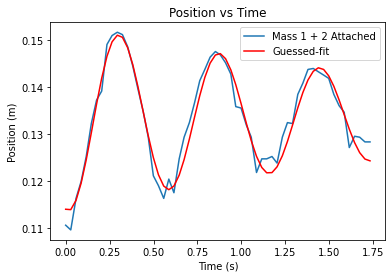

In [ ]:
# coefficient = b / 2m

# Obtain our other guess fit parameters
guess_amplitude_m2_2 = 0.02
guess_angular_frequency_m2_2 = 11
guess_phase_m2_2 = 4.5

# Use the formula for the coeffieicnt to obtain the guess for the coefficient
guess_coefficient_m2_2 = -np.log((peak_pos_2_m2_2 - guess_offset_m2_2) / (peak_pos_1_m2_2 - guess_offset_m2_2)) / (peak_time_2_m2_2 - peak_time_1_m2_2)

plt.plot(time_window_m2_2, position_window_m2_2, label = 'Mass 1 + 2 Attached')
plt.plot(time_window_m2_2, damped_fit_function(time_window_m2_2, guess_amplitude_m2_2, guess_coefficient_m2_2, guess_angular_frequency_m2_2, guess_phase_m2_2, guess_offset_m2_2), color = 'r', label = 'Guessed-fit')

plt.title('Position vs Time')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

# Combine these into our guess parameters for our fit function
guess_params_m2_2 = np.array([guess_amplitude_m2_2, guess_coefficient_m2_2, guess_angular_frequency_m2_2, guess_phase_m2_2, guess_offset_m2_2])

Amplitude: 0.022633562305308812
Coefficient: 0.6498417468480309
Angular Frequency: 11.148789396422774
Phase: 4.529071443807193
Offset: 0.134157610562963


Text(0, 0.5, 'Position (m)')

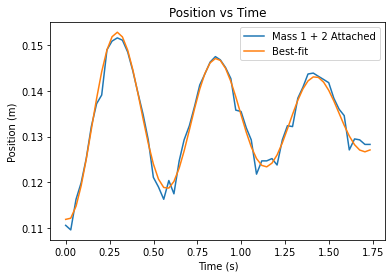

In [ ]:
# Use curve_fit to obtain the best-fit parameters
optimal_params_m2_2, param_covariance_m2_2 = sp.curve_fit(damped_fit_function, time_window_m2_2, position_window_m2_2, p0 = guess_params_m2_2)

best_amplitude_m2_2 = optimal_params_m2_2[0]
best_amplitude_error_m2_2 = np.sqrt(param_covariance_m2_2[0, 0])
print("Amplitude: " + str(best_amplitude_m2_2))

best_coefficient_m2_2 = optimal_params_m2_2[1]
best_coefficient_error_m2_2 = np.sqrt(param_covariance_m2_2[1, 1])
print("Coefficient: " + str(best_coefficient_m2_2))

best_angular_frequency_m2_2 = optimal_params_m2_2[2]
best_angular_frequency_error_m2_2 = np.sqrt(param_covariance_m2_2[2, 2])
print("Angular Frequency: " + str(best_angular_frequency_m2_2))

best_phase_m2_2 = optimal_params_m2_2[3]
best_phase_error_m2_2 = np.sqrt(param_covariance_m2_2[3, 3])
print("Phase: " + str(best_phase_m2_2))

best_offset_m2_2 = optimal_params_m2_2[4]
best_offset_error_m2_2 = np.sqrt(param_covariance_m2_2[4, 4])
print("Offset: " + str(best_offset_m2_2))

# Plot the position vs. time and best-fit
plt.plot(time_window_m2_2, position_window_m2_2, label = 'Mass 1 + 2 Attached')
plt.plot(time_window_m2_2, damped_fit_function(time_window_m2_2, best_amplitude_m2_2, best_coefficient_m2_2, best_angular_frequency_m2_2, best_phase_m2_2, best_offset_m2_2), label = 'Best-fit')

# Include title, axis labels, legend
plt.title('Position vs Time')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

In [ ]:
b_m2_2 = (2 * mass_m2) * best_coefficient_m2_2
b_error_m2_2 = b_m2_2 * np.sqrt((((2 * mass_m2 * mass_error_m2) / mass_m2) / (2*mass_m2))**2 + (best_coefficient_error_m2_2 / best_coefficient_m2_2)**2)
print(b_m2_2)
print(b_error_m2_2)

1.2320999520238665
0.08563196824911368


**Mass 1 + 2 Trial 3**

Text(0, 0.5, 'Position (m)')

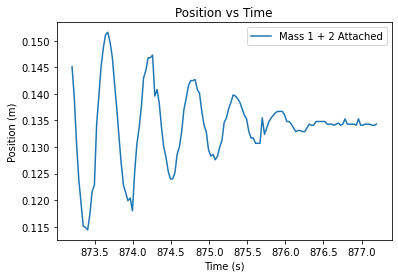

In [ ]:
# Read in the data from the Arduino
read_in_array_m2_3 = np.loadtxt('/content/drive/MyDrive/Academics/2022-2023/Winter 2023/Physics 4AL/Final Project/Horizontal Oscillation Trial3(mass 1_2).txt', delimiter = ';')

# Extract the time and position of the Arduino. Convert the time from milliseconds to seconds and the position from centimeters to meters
time_m2_3 = read_in_array_m2_3[:, 0] / 1000
position_m2_3 = read_in_array_m2_3[:, 1] / 100


# Plot the position of the Arduino as a function of time
plt.plot(time_m2_3, position_m2_3, label = 'Mass 1 + 2 Attached')

# Include title, axis labels
plt.title('Position vs Time')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

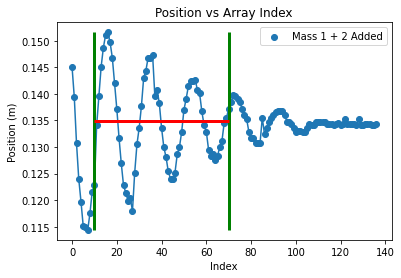

In [ ]:
# Change the start and stop indecies to cover a range of 3-4 oscillations
start_index_m2_3 = 10
stop_index_m2_3 = 70

# Plot the position vs. array index
plt.scatter(np.arange(len(position_m2_3)), position_m2_3, label = "Mass 1 + 2 Added")
plt.plot(np.arange(len(position_m2_3)), position_m2_3)

# Include a title and axis labels
plt.title('Position vs Array Index')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Position (m)')

# These green vertical lines are the start and stop times. The red line is the offset guess
# Change the start and stop times so that they intersect the red line at the same points where they intersect the data
plt.vlines([start_index_m2_3, stop_index_m2_3], np.min(position_m2_3), np.max(position_m2_3), color = 'green', linewidth = 3)

guess_offset_m2_3 = np.mean(position_m2_3[start_index_m2_3:stop_index_m2_3])

plt.hlines(guess_offset_m2_3, start_index_m2_3, stop_index_m2_3, color = 'red', linewidth = 3)

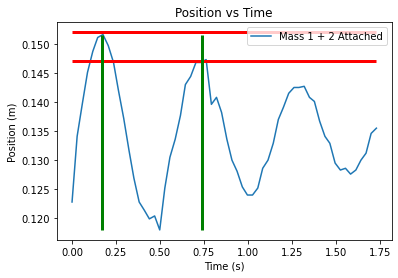

In [ ]:
# Extract the data within our specified window
time_window_m2_3 = time_m2_3[start_index_m2_3:stop_index_m2_3] - time_m2_3[start_index_m2_3]
position_window_m2_3 = position_m2_3[start_index_m2_3:stop_index_m2_3]

# Change these two horizontal line positions so that they align with two peaks of the data
peak_pos_1_m2_3 = 0.152
peak_pos_2_m2_3 = 0.147

# Change these two vertical line positions so that they align with the previously obtained peaks
peak_time_1_m2_3 = 0.17
peak_time_2_m2_3 = 0.74

# Plot the position vs. time. Include a title and axis labels
plt.plot(time_window_m2_3, position_window_m2_3, label = 'Mass 1 + 2 Attached')
plt.title('Position vs Time')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

# Plot the horizontal lines for the peak positions and the vertical lines for the peak times

plt.hlines([peak_pos_1_m2_3, peak_pos_2_m2_3], time_window_m2_3[0], time_window_m2_3[-1], color = 'red', linewidth = 3)
plt.vlines([peak_time_1_m2_3, peak_time_2_m2_3], np.min(position_window_m2_3), np.max(position_window_m2_3), color = 'green', linewidth = 3)

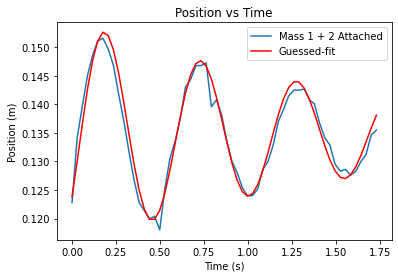

In [ ]:
# coefficient = b / 2m

# Obtain our other guess fit parameters
guess_amplitude_m2_3 = 0.02
guess_angular_frequency_m2_3 = 11.5
guess_phase_m2_3 = 5.7

# Use the formula for the coeffieicnt to obtain the guess for the coefficient
guess_coefficient_m2_3 = -np.log((peak_pos_2_m2_3 - guess_offset_m2_3) / (peak_pos_1_m2_3 - guess_offset_m2_3)) / (peak_time_2_m2_3 - peak_time_1_m2_3)

plt.plot(time_window_m2_3, position_window_m2_3, label = 'Mass 1 + 2 Attached')
plt.plot(time_window_m2_3, damped_fit_function(time_window_m2_3, guess_amplitude_m2_3, guess_coefficient_m2_3, guess_angular_frequency_m2_3, guess_phase_m2_3, guess_offset_m2_3), color = 'r', label = 'Guessed-fit')

plt.title('Position vs Time')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

# Combine these into our guess parameters for our fit function
guess_params_m2_3 = np.array([guess_amplitude_m2_3, guess_coefficient_m2_3, guess_angular_frequency_m2_3, guess_phase_m2_3, guess_offset_m2_3])

Amplitude: 0.0201366824455308
Coefficient: 0.6805312799941579
Angular Frequency: 11.230705230381462
Phase: 5.901971194395902
Offset: 0.13428120012447112


Text(0, 0.5, 'Position (m)')

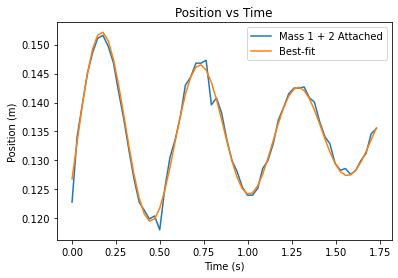

In [ ]:
# Use curve_fit to obtain the best-fit parameters
optimal_params_m2_3, param_covariance_m2_3 = sp.curve_fit(damped_fit_function, time_window_m2_3, position_window_m2_3, p0 = guess_params_m2_3)

best_amplitude_m2_3 = optimal_params_m2_3[0]
best_amplitude_error_m2_3 = np.sqrt(param_covariance_m2_3[0, 0])
print("Amplitude: " + str(best_amplitude_m2_3))

best_coefficient_m2_3 = optimal_params_m2_3[1]
best_coefficient_error_m2_3 = np.sqrt(param_covariance_m2_3[1, 1])
print("Coefficient: " + str(best_coefficient_m2_3))

best_angular_frequency_m2_3 = optimal_params_m2_3[2]
best_angular_frequency_error_m2_3 = np.sqrt(param_covariance_m2_3[2, 2])
print("Angular Frequency: " + str(best_angular_frequency_m2_3))

best_phase_m2_3 = optimal_params_m2_3[3]
best_phase_error_m2_3 = np.sqrt(param_covariance_m2_3[3, 3])
print("Phase: " + str(best_phase_m2_3))

best_offset_m2_3 = optimal_params_m2_3[4]
best_offset_error_m2_3 = np.sqrt(param_covariance_m2_3[4, 4])
print("Offset: " + str(best_offset_m2_3))

# Plot the position vs. time and best-fit
plt.plot(time_window_m2_3, position_window_m2_3, label = 'Mass 1 + 2 Attached')
plt.plot(time_window_m2_3, damped_fit_function(time_window_m2_3, best_amplitude_m2_3, best_coefficient_m2_3, best_angular_frequency_m2_3, best_phase_m2_3, best_offset_m2_3), label = 'Best-fit')

# Include title, axis labels, legend
plt.title('Position vs Time')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

In [ ]:
b_m2_3 = (2 * mass_m2) * best_coefficient_m2_3
b_error_m2_3 = b_m2_3 * np.sqrt((((2 * mass_m2 * mass_error_m2) / mass_m2) / (2*mass_m2))**2 + (best_coefficient_error_m2_3 / best_coefficient_m2_3)**2)
print(b_m2_3)
print(b_error_m2_3)

1.2902873068689231
0.07945321740324958


In [ ]:
b_m2 = (b_m2_1 + b_m2_2 + b_m2_3)/3
print("Average b value: " + str(b_m2))
b_m2_error = np.sqrt(b_error_m2_1**2 + b_error_m2_2**2 + b_error_m2_3**2)
b_m2_error = (b_m2) * b_m2_error / (b_m2_1 + b_m2_2 + b_m2_3)
print("Average b value error: " + str(b_m2_error))

Average b value: 1.2578667523791038
Average b value error: 0.043633508110655854


**Graphing Mass vs b**

Text(0, 0.5, 'Damping Constant')

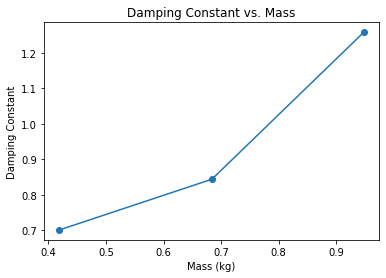

In [ ]:
masses = np.array([mass_nm, mass_m1, mass_m2])
b = np.array([b_nm, b_m1, b_m2])

plt.scatter(masses, b)
plt.plot(masses, b)
plt.title("Damping Constant vs. Mass")
plt.xlabel("Mass (kg)")
plt.ylabel("Damping Constant")

**No Mass Stacked Graphs**

Text(0, 0.5, 'Position (m)')

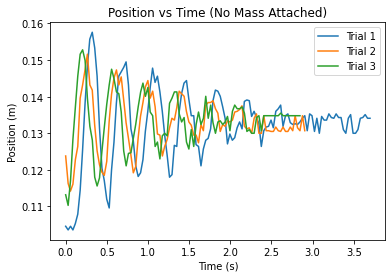

In [ ]:
# Plot the position of the Arduino as a function of time
plt.plot(time_nm_1 - time_nm_1[0], position_nm_1, label = 'Trial 1')
plt.plot(time_nm_2 - time_nm_2[0], position_nm_2, label = 'Trial 2')
plt.plot(time_nm_3 - time_nm_3[0], position_nm_3, label = 'Trial 3')

# Include title, axis labels
plt.title('Position vs Time (No Mass Attached)')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

Text(0, 0.5, 'Position (m)')

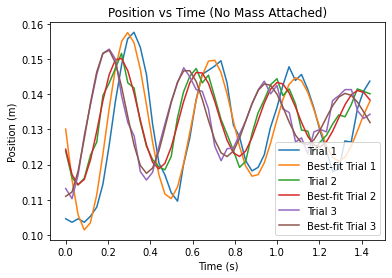

In [ ]:
# Plot the position vs. time and best-fit
plt.plot(time_window_nm_1, position_window_nm_1, label = 'Trial 1')
plt.plot(time_window_nm_1, damped_fit_function(time_window_nm_1, best_amplitude_nm_1, best_coefficient_nm_1, best_angular_frequency_nm_1, best_phase_nm_1, best_offset_nm_1), label = 'Best-fit Trial 1')

# Plot the position vs. time and best-fit
plt.plot(time_window_nm_2, position_window_nm_2, label = 'Trial 2')
plt.plot(time_window_nm_2, damped_fit_function(time_window_nm_2, best_amplitude_nm_2, best_coefficient_nm_2, best_angular_frequency_nm_2, best_phase_nm_2, best_offset_nm_2), label = 'Best-fit Trial 2')

# Plot the position vs. time and best-fit
plt.plot(time_window_nm_3, position_window_nm_3, label = 'Trial 3')
plt.plot(time_window_nm_3, damped_fit_function(time_window_nm_3, best_amplitude_nm_3, best_coefficient_nm_3, best_angular_frequency_nm_3, best_phase_nm_3, best_offset_nm_3), label = 'Best-fit Trial 3')

# Include title, axis labels, legend
plt.title('Position vs Time (No Mass Attached)')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

**Mass 1 Stacked Graphs**

Text(0, 0.5, 'Position (m)')

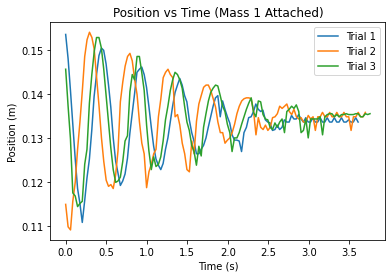

In [ ]:
# Plot the position of the Arduino as a function of time
plt.plot(time_m1_1 - time_m1_1[0], position_m1_1, label = 'Trial 1')
plt.plot(time_m1_2 - time_m1_2[0], position_m1_2, label = 'Trial 2')
plt.plot(time_m1_3 - time_m1_3[0], position_m1_3, label = 'Trial 3')

# Include title, axis labels
plt.title('Position vs Time (Mass 1 Attached)')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

Text(0, 0.5, 'Position (m)')

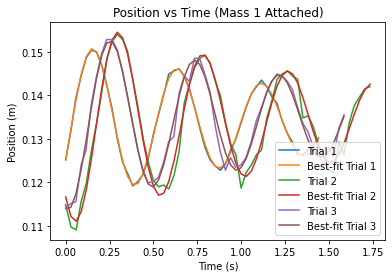

In [ ]:
# Plot the position vs. time and best-fit
plt.plot(time_window_m1_1, position_window_m1_1, label = 'Trial 1')
plt.plot(time_window_m1_1, damped_fit_function(time_window_m1_1, best_amplitude_m1_1, best_coefficient_m1_1, best_angular_frequency_m1_1, best_phase_m1_1, best_offset_m1_1), label = 'Best-fit Trial 1')

# Plot the position vs. time and best-fit
plt.plot(time_window_m1_2, position_window_m1_2, label = 'Trial 2')
plt.plot(time_window_m1_2, damped_fit_function(time_window_m1_2, best_amplitude_m1_2, best_coefficient_m1_2, best_angular_frequency_m1_2, best_phase_m1_2, best_offset_m1_2), label = 'Best-fit Trial 2')

# Plot the position vs. time and best-fit
plt.plot(time_window_m1_3, position_window_m1_3, label = 'Trial 3')
plt.plot(time_window_m1_3, damped_fit_function(time_window_m1_3, best_amplitude_m1_3, best_coefficient_m1_3, best_angular_frequency_m1_3, best_phase_m1_3, best_offset_m1_3), label = 'Best-fit Trial 3')

# Include title, axis labels, legend
plt.title('Position vs Time (Mass 1 Attached)')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

**Mass 1 + 2 Attached Stacked Graphs**

Text(0, 0.5, 'Position (m)')

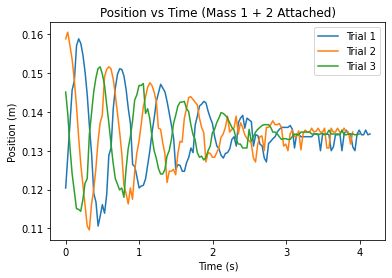

In [ ]:
# Plot the position of the Arduino as a function of time
plt.plot(time_m2_1 - time_m2_1[0], position_m2_1, label = 'Trial 1')
plt.plot(time_m2_2 - time_m2_2[0], position_m2_2, label = 'Trial 2')
plt.plot(time_m2_3 - time_m2_3[0], position_m2_3, label = 'Trial 3')

# Include title, axis labels
plt.title('Position vs Time (Mass 1 + 2 Attached)')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

Text(0, 0.5, 'Position (m)')

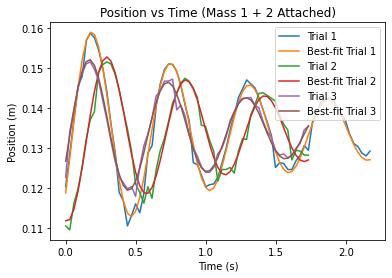

In [ ]:
# Plot the position vs. time and best-fit
plt.plot(time_window_m2_1, position_window_m2_1, label = 'Trial 1')
plt.plot(time_window_m2_1, damped_fit_function(time_window_m2_1, best_amplitude_m2_1, best_coefficient_m2_1, best_angular_frequency_m2_1, best_phase_m2_1, best_offset_m2_1), label = 'Best-fit Trial 1')

# Plot the position vs. time and best-fit
plt.plot(time_window_m2_2, position_window_m2_2, label = 'Trial 2')
plt.plot(time_window_m2_2, damped_fit_function(time_window_m2_2, best_amplitude_m2_2, best_coefficient_m2_2, best_angular_frequency_m2_2, best_phase_m2_2, best_offset_m2_2), label = 'Best-fit Trial 2')

# Plot the position vs. time and best-fit
plt.plot(time_window_m2_3, position_window_m2_3, label = 'Trial 3')
plt.plot(time_window_m2_3, damped_fit_function(time_window_m2_3, best_amplitude_m2_3, best_coefficient_m2_3, best_angular_frequency_m2_3, best_phase_m2_3, best_offset_m2_3), label = 'Best-fit Trial 3')

# Include title, axis labels, legend
plt.title('Position vs Time (Mass 1 + 2 Attached)')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')